# 🔹**Importing** **Libraries**

In [2]:
# Install required library
!pip install scikit-surprise

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis and preprocessing
from scipy.stats import norm, stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, confusion_matrix, accuracy_score, f1_score, 
    roc_curve, classification_report, precision_score, recall_score)

# Cosine similarity and sparse matrices
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Surprise library for recommendation systems
from surprise import Reader, Dataset, SVD, SVDpp, NMF, SlopeOne, CoClustering, accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

# Other utilities
from collections import defaultdict
import ast
import matplotlib

Defaulting to user installation because normal site-packages is not writeable


# 🔹Loading Datasets 

In [5]:
# Importing necessary libraries
import pandas as pd
# Load datasets
users_path = r"C:\Users\nehaa\Downloads\Sem-4 FDS Dataset Book Recommendation System\Users.csv"
books_path = r"C:\Users\nehaa\Downloads\Sem-4 FDS Dataset Book Recommendation System\Books.csv"
ratings_path = r"C:\Users\nehaa\Downloads\Sem-4 FDS Dataset Book Recommendation System\Ratings.csv"

# Load datasets
df_users = pd.read_csv(users_path)
df_books = pd.read_csv(books_path)
df_ratings = pd.read_csv(ratings_path)

# Print confirmation
print("Datasets Loaded Successfully!")

Datasets Loaded Successfully!


In [12]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [14]:
df_books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [16]:
df_ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Initial dataset size 

In [10]:
# Merge ratings with users
df_merged = pd.merge(df_ratings, df_users, on='User-ID', how='inner')
# Merge the result with books
df_combined = pd.merge(df_merged, df_books, on='ISBN', how='inner')
print("🧾 Column names in the dataset:")
print(df_combined.columns.tolist())
print(f"📦 Initial dataset size: {df_combined.shape[0]} rows, {df_combined.shape[1]} columns")

🧾 Column names in the dataset:
['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
📦 Initial dataset size: 1031136 rows, 12 columns


## 🔹Data Information 

In [19]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [21]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [23]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


# **Handling Missing Vaules**

## 🔹Checking for missing values in each DataFrame

In [28]:
print("Missing values in books data:")
# Check for missing values
print("Missing values in Users data:")
print(df_users.isnull().sum())

print("\nMissing values in Books data:")
print(df_books.isnull().sum())

print("\nMissing values in Ratings data:")
print(df_ratings.isnull().sum())

Missing values in books data:
Missing values in Users data:
User-ID          0
Location         0
Age         110762
dtype: int64

Missing values in Books data:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Missing values in Ratings data:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


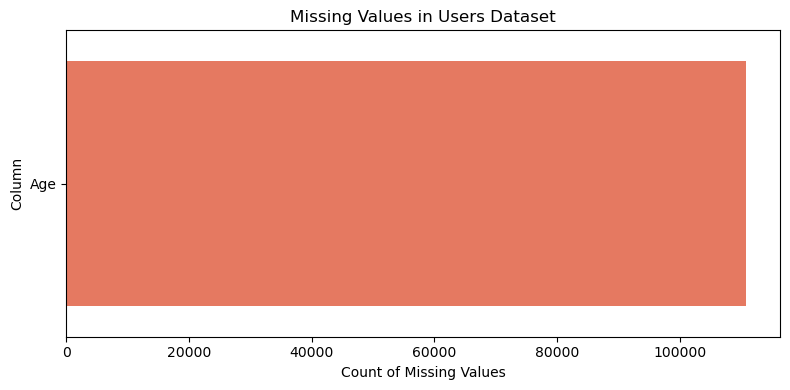

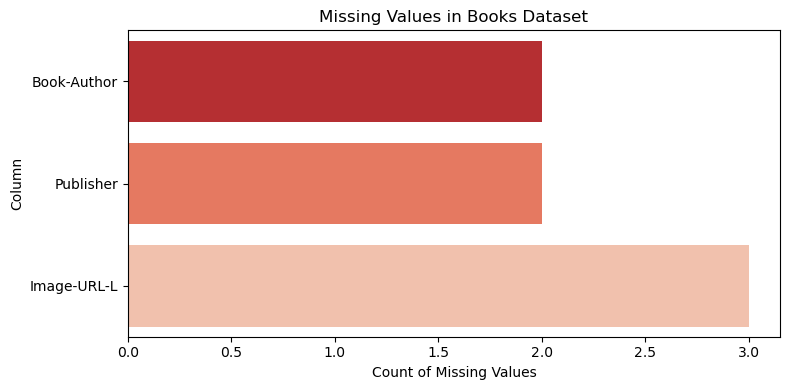

✅ No missing values in Ratings Dataset


In [30]:
def missing_values_barplot(df, title):
    missing = df.isnull().sum().reset_index()
    missing.columns = ['Column', 'MissingValues']
    missing = missing[missing['MissingValues'] > 0]
    if missing.empty:
        print(f"✅ No missing values in {title}")
        return
    plt.figure(figsize=(8, 4))
    sns.barplot(x='MissingValues', y='Column', data=missing, palette='Reds_r')
    plt.title(f"Missing Values in {title}")
    plt.xlabel("Count of Missing Values")
    plt.ylabel("Column")
    plt.tight_layout()
    plt.show()
missing_values_barplot(df_users, "Users Dataset")
missing_values_barplot(df_books, "Books Dataset")
missing_values_barplot(df_ratings, "Ratings Dataset")

## 🔹Summary of statistical information

In [35]:
# Descriptive stats for Users dataset (especially Age)
print("📊 Users Dataset - Age Stats:")
print(df_users['Age'].describe())
print("\n")

# Descriptive stats for Ratings dataset
print("📊 Ratings Dataset - Book-Rating Stats:")
print(df_ratings['Book-Rating'].describe())
print("\n")

# Descriptive stats for Books dataset
# If Year-Of-Publication is numeric
if pd.api.types.is_numeric_dtype(df_books['Year-Of-Publication']):
    print("📊 Books Dataset - Year of Publication Stats:")
    print(df_books['Year-Of-Publication'].describe())
else:
    print("⚠️ 'Year-Of-Publication' is not numeric. You may need to clean it first.")

📊 Users Dataset - Age Stats:
count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64


📊 Ratings Dataset - Book-Rating Stats:
count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64


⚠️ 'Year-Of-Publication' is not numeric. You may need to clean it first.


### -> Cleaning the Age column by keeping only realistic values

In [38]:
df_users = df_users[(df_users['Age'] >= 5) & (df_users['Age'] <= 100)]
print("✅ Age values cleaned.")

✅ Age values cleaned.


### -> Converting Year of Publication to Numeric 

In [41]:
original_years = df_books['Year-Of-Publication'].copy()

# Convert non-numeric values to NaN
df_books['Year-Of-Publication'] = pd.to_numeric(df_books['Year-Of-Publication'], errors='coerce')

converted_count = df_books['Year-Of-Publication'].notna().sum()
total_count = len(df_books)
print(f"🔄 Converted to numeric: {converted_count} out of {total_count} entries")

# Replace weird years (like 0 or > 2025) with NaN
invalid_years = df_books.loc[(df_books['Year-Of-Publication'] < 1000) | 
                             (df_books['Year-Of-Publication'] > 2025), 'Year-Of-Publication']
print(f"⚠️ Found {len(invalid_years)} invalid years (before 1000 or after 2025)")

df_books.loc[(df_books['Year-Of-Publication'] < 1000) | 
             (df_books['Year-Of-Publication'] > 2025), 'Year-Of-Publication'] = pd.NA

# Fill with median year
median_year = int(df_books['Year-Of-Publication'].median(skipna=True))
df_books['Year-Of-Publication'].fillna(median_year, inplace=True)

# Count how many were filled
filled_count = df_books['Year-Of-Publication'].isna().sum()
print(f"🧹 Filled {filled_count} missing or invalid 'Year-Of-Publication' entries with median: {median_year}")

print("✅ 'Year-Of-Publication' column cleaned and standardized.")


🔄 Converted to numeric: 271357 out of 271360 entries
⚠️ Found 4630 invalid years (before 1000 or after 2025)
🧹 Filled 0 missing or invalid 'Year-Of-Publication' entries with median: 1996
✅ 'Year-Of-Publication' column cleaned and standardized.


#### Cleaning Year of Publicattion 

In [46]:
# Convert non-numeric values to NaN
df_books['Year-Of-Publication'] = pd.to_numeric(df_books['Year-Of-Publication'], errors='coerce')

# Optionally: replace weird years (like 0 or > 2025) with median
df_books.loc[(df_books['Year-Of-Publication'] < 1000) | 
             (df_books['Year-Of-Publication'] > 2025), 'Year-Of-Publication'] = pd.NA

# Fill with median year
median_year = int(df_books['Year-Of-Publication'].median(skipna=True))
df_books['Year-Of-Publication'].fillna(median_year, inplace=True)
print("✅ Cleaned 'Year-Of-Publication' column.")

✅ Cleaned 'Year-Of-Publication' column.


## Describe :- Age

In [55]:
df_users['Age'].describe()

count    166848.000000
mean         34.746638
std          13.633051
min           5.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         100.000000
Name: Age, dtype: float64

## Describe :- Ratings

In [210]:
df_ratings['Book-Rating'].describe()

count    433671.000000
mean          7.601066
std           1.843798
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Book-Rating, dtype: float64

## 🔹Filling NaN Values in Age Column with Median

In [64]:
# Check how many are missing before
missing_before = df_users['Age'].isna().sum()

# Calculate median age (ignoring NaNs)
median_age = int(df_users['Age'].median(skipna=True))

# Fill NaN with median
df_users['Age'].fillna(median_age, inplace=True)

# Check how many are missing after
missing_after = df_users['Age'].isna().sum()

print(f"🧮 Filled missing 'Age' values with median: {median_age}")
print(f"✅ Missing 'Age' values after filling: {missing_after}")


🧮 Filled missing 'Age' values with median: 32
✅ Missing 'Age' values after filling: 0


# Removing Duplicates 

## 🔹Duplicates in Books Dataset 

In [70]:
# Remove duplicates
df_books = df_books.drop_duplicates()

# Check for duplicates
print(f"Duplicates in books data: {df_books.duplicated().sum()}")

Duplicates in books data: 0


## 🔹Duplicates in Users Dataset

In [73]:
df_users = pd.read_csv(users_path)

# Check for duplicates
print(f"Duplicates in users data: {df_users.duplicated().sum()}")

Duplicates in users data: 0


## 🔹Duplicates in Ratings Dataset

In [76]:
df_ratings = pd.read_csv(ratings_path)

# Check for duplicates
print(f"Duplicates in ratings data: {df_ratings.duplicated().sum()}")

Duplicates in ratings data: 0


# 🔹Detecting Outliers 

## -> Outliers in Age (Users Dataset)

In [86]:
Q1 = df_users['Age'].quantile(0.25)
Q3 = df_users['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

age_outliers = df_users[(df_users['Age'] < lower_bound) | (df_users['Age'] > upper_bound)]

print("📌 Age Outliers:")
print(age_outliers[['User-ID', 'Age']])
print(f"Total Age Outliers: {len(age_outliers)}\n")


📌 Age Outliers:
        User-ID    Age
220         221   79.0
689         690   80.0
957         958   78.0
1147       1148   79.0
1288       1289  103.0
...         ...    ...
278301   278302  104.0
278317   278318   77.0
278348   278349   76.0
278412   278413   76.0
278471   278472   81.0

[1084 rows x 2 columns]
Total Age Outliers: 1084



## -> Outliers in Year-Of-Publication (Books)

In [90]:
# Year of Publication outliers
Q1 = df_books['Year-Of-Publication'].quantile(0.25)
Q3 = df_books['Year-Of-Publication'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

year_outliers = df_books[(df_books['Year-Of-Publication'] < lower_bound) | (df_books['Year-Of-Publication'] > upper_bound)]

print("📌 Year of Publication Outliers:")
print(year_outliers[['ISBN', 'Book-Title', 'Year-Of-Publication']])
print(f"Total Year Outliers: {len(year_outliers)}\n")


📌 Year of Publication Outliers:
              ISBN                                         Book-Title  \
75      0451625889                                         The Prince   
196     3499110695                               Neun ErzÃ?Â¤hlungen.   
241     0803251718                                        Crazy Horse   
310     0520011171                          Sappho: A New Translation   
388     0156528207                                  The Little Prince   
...            ...                                                ...   
271180  0822502763  Antonyms: Hot and Cold and Other Words That Ar...   
271181  0877830592                                       Quetico Wolf   
271250  073943828X  Murder at the Manor (Mystery Guild Lost Classi...   
271293  0226751260  The Jack-Roller: A Delinquent Boy's Own Story ...   
271301  0843101083                     Off-The-Wall (Mad Libs, No. 6)   

        Year-Of-Publication  
75                   1952.0  
196                  1968.0  
2

## ->Outliers in (Rating)

In [98]:
# Book-Rating outliers
Q1 = df_ratings['Book-Rating'].quantile(0.25)
Q3 = df_ratings['Book-Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

rating_outliers = df_ratings[(df_ratings['Book-Rating'] < lower_bound) | (df_ratings['Book-Rating'] > upper_bound)]

print("📌 Book Rating Outliers:")
print(rating_outliers[['User-ID', 'ISBN', 'Book-Rating']])
print(f"Total Rating Outliers: {len(rating_outliers)}\n")

📌 Book Rating Outliers:
Empty DataFrame
Columns: [User-ID, ISBN, Book-Rating]
Index: []
Total Rating Outliers: 0



In [100]:
## Dropping outliers 

In [108]:
# Book-Rating outliers
Q1 = df_ratings['Book-Rating'].quantile(0.25)
Q3 = df_ratings['Book-Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

rating_outliers = df_ratings[(df_ratings['Book-Rating'] < lower_bound) | (df_ratings['Book-Rating'] > upper_bound)]

print("📌 Book Rating Outliers:")
print(rating_outliers[['User-ID', 'ISBN', 'Book-Rating']])
print(f"Total Rating Outliers: {len(rating_outliers)}\n")

📌 Book Rating Outliers:
Empty DataFrame
Columns: [User-ID, ISBN, Book-Rating]
Index: []
Total Rating Outliers: 0



## Handling outliers in year of publication

In [115]:
# Keeping only rows where Year-Of-Publication is >= 1960
df_books = df_books[df_books['Year-Of-Publication'] >= 1960]

print("✅ Removed books published before 1960.")
print(f"📚 Remaining books: {df_books.shape[0]} rows")
df_books = df_books[df_books['Year-Of-Publication'] >= 1960]

✅ Removed books published before 1960.
📚 Remaining books: 270444 rows


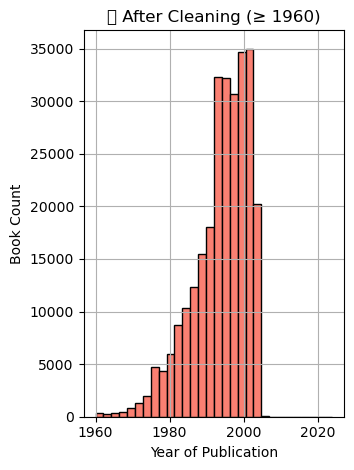

In [117]:
plt.subplot(1, 2, 2)
df_books['Year-Of-Publication'].hist(bins=30, color='salmon', edgecolor='black')
plt.title('📕 After Cleaning (≥ 1960)')
plt.xlabel('Year of Publication')
plt.ylabel('Book Count')

plt.tight_layout()
plt.show()

## Dropping Age

In [134]:
# Drop the 'Age' column
df_users.drop(columns=['Age'], inplace=True)

print("🗑️ Dropped 'Age' column from users dataset.")


🗑️ Dropped 'Age' column from users dataset.


In [136]:
print("📋 Columns in the users dataset:")
print(df_users.columns.tolist())


📋 Columns in the users dataset:
['User-ID', 'Location']


# Creating histograms, box plots, scatter plots, and correlation matrices to understand patterns

## 🔹Histogram for Book Rating Distribution

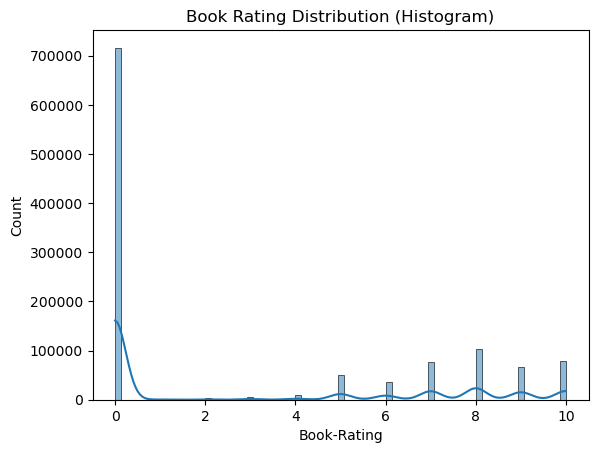

In [148]:
sns.histplot(df_ratings['Book-Rating'], kde=True)
plt.title('Book Rating Distribution (Histogram)')  
plt.show()

## 🔹Correlation Matrix

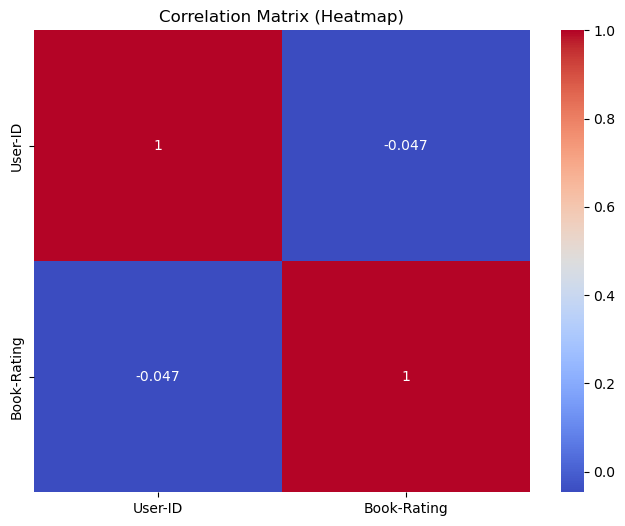

In [151]:
numerical_cols = df_ratings.select_dtypes(include='number').columns
if len(numerical_cols) > 1:  
    plt.figure(figsize=(8, 6))
    correlation_matrix = df_ratings[numerical_cols].dropna().corr()
    if not correlation_matrix.empty:
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix (Heatmap)')
        plt.show()
    else:
        print("Correlation matrix is empty. Check your dataset.")

## 🔹No.of ratings(Scatter plot)

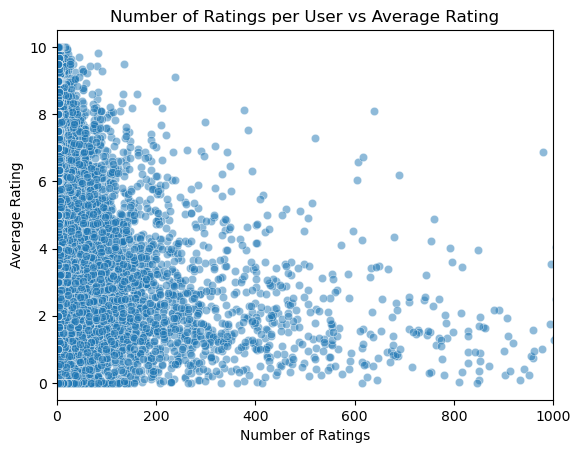

In [155]:
user_stats = df_ratings.groupby('User-ID')['Book-Rating'].agg(['count', 'mean']).reset_index()
plt.xlim(0, 1000)  # Or adjust based on your data

sns.scatterplot(data=user_stats, x='count', y='mean', alpha=0.5)
plt.title("Number of Ratings per User vs Average Rating")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()


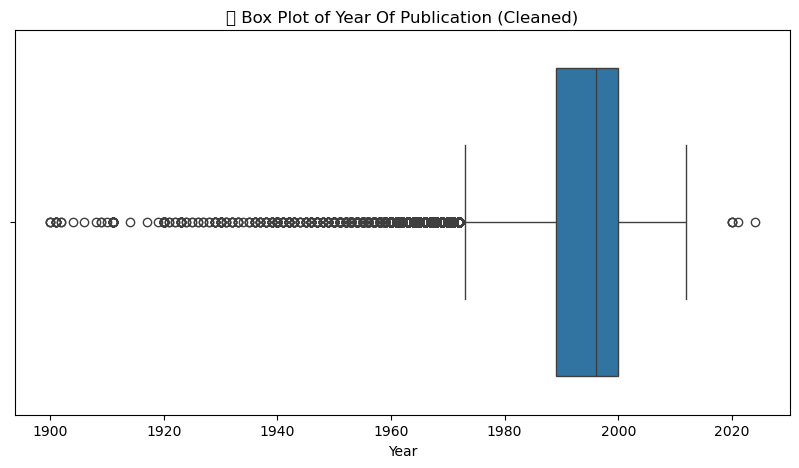

In [265]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
books_df_clean = books_df.dropna(subset=['Year-Of-Publication'])
books_df_clean = books_df_clean[(books_df_clean['Year-Of-Publication'] >= 1900) & 
                                (books_df_clean['Year-Of-Publication'] <= 2025)]

plt.figure(figsize=(10, 5))
sns.boxplot(x=books_df_clean['Year-Of-Publication'])
plt.title('📦 Box Plot of Year Of Publication (Cleaned)')
plt.xlabel('Year')
plt.show()


## 🔹Merging users and ratings dataset on User-ID column

In [166]:
# Loaded datasets:
users_path = r"C:\Users\nehaa\Downloads\Sem-4 FDS Dataset Book Recommendation System\Users.csv"
ratings_path = r"C:\Users\nehaa\Downloads\Sem-4 FDS Dataset Book Recommendation System\Ratings.csv"
df_users = pd.read_csv(users_path)
df_ratings = pd.read_csv(ratings_path)
df_users.rename(columns={"UserID": "User-ID"}, inplace=True)
df_ratings.rename(columns={"UserID": "User-ID"}, inplace=True)
data_users_ratings = pd.merge(df_users, df_ratings, on="User-ID")
print(data_users_ratings.head())

   User-ID                   Location   Age        ISBN  Book-Rating
0        2  stockton, california, usa  18.0  0195153448            0
1        7        washington, dc, usa   NaN   034542252            0
2        8   timmins, ontario, canada   NaN  0002005018            5
3        8   timmins, ontario, canada   NaN  0060973129            0
4        8   timmins, ontario, canada   NaN  0374157065            0


## 🔹Merging combined data of users and ratings with books data on ISBN column

In [169]:
merged = pd.merge(df_books, data_users_ratings, on="ISBN")
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028067 entries, 0 to 1028066
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1028067 non-null  object 
 1   Book-Title           1028067 non-null  object 
 2   Book-Author          1028065 non-null  object 
 3   Year-Of-Publication  1028067 non-null  float64
 4   Publisher            1028065 non-null  object 
 5   Image-URL-S          1028067 non-null  object 
 6   Image-URL-M          1028067 non-null  object 
 7   Image-URL-L          1028063 non-null  object 
 8   User-ID              1028067 non-null  int64  
 9   Location             1028067 non-null  object 
 10  Age                  751004 non-null   float64
 11  Book-Rating          1028067 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 94.1+ MB


### head of all 3 merged dataframe

In [172]:
merged.head() 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,"stockton, california, usa",18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,"timmins, ontario, canada",NaN,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,"ottawa, ontario, canada",49.0,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",NaN,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,"sudbury, ontario, canada",NaN,0


## 🔹Dropping unnecessary features

### After removing unnecessary features

In [179]:
merged.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1,inplace=True)
merged.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2,"stockton, california, usa",18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,"timmins, ontario, canada",NaN,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11400,"ottawa, ontario, canada",49.0,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,"n/a, n/a, n/a",NaN,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,41385,"sudbury, ontario, canada",NaN,0


## 🔹Top 10 sold book

In [182]:
Top10_Book=merged['Book-Title'].value_counts().reset_index().head(10)
Top10_Book.rename(columns={'index':'Book-Title','Book-Title':'Count'},inplace=True)
Top10_Book

,Count,count
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,898
3,A Painted House,838
4,The Nanny Diaries: A Novel,828
5,Bridget Jones's Diary,815
6,The Secret Life of Bees,774
7,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
8,The Red Tent (Bestselling Backlist),723
9,Angels &amp; Demons,670


## 🔹The Most-read book based on rating count

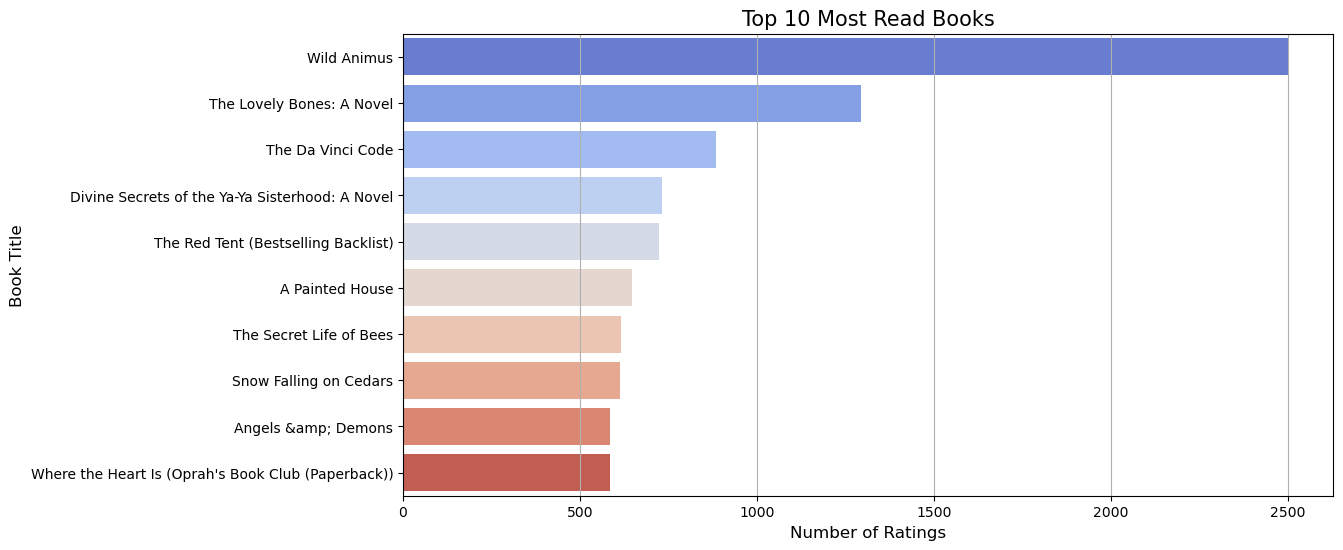

In [185]:
# Grouping by ISBN to count the number of ratings per book
book_ratings_count = df_ratings.groupby('ISBN').size().reset_index(name='rating_count')
most_read_books = pd.merge(book_ratings_count, df_books, on='ISBN')
top_most_read_books = most_read_books.sort_values(by='rating_count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_most_read_books['Book-Title'], x=top_most_read_books['rating_count'], palette="coolwarm")
plt.xlabel("Number of Ratings", fontsize=12)
plt.ylabel("Book Title", fontsize=12)
plt.title("Top 10 Most Read Books", fontsize=15)
plt.grid(axis='x')
plt.show()

## 🔹Books With Same Title but different Author

In [188]:
df_books['Book-Title'].value_counts().head(10)

Book-Title
Selected Poems                    26
Little Women                      24
The Secret Garden                 20
Dracula                           20
Jane Eyre                         19
Pride and Prejudice               18
The Night Before Christmas        17
Great Expectations                17
Adventures of Huckleberry Finn    17
Wuthering Heights                 17
Name: count, dtype: int64

## 🔹Top 10 author

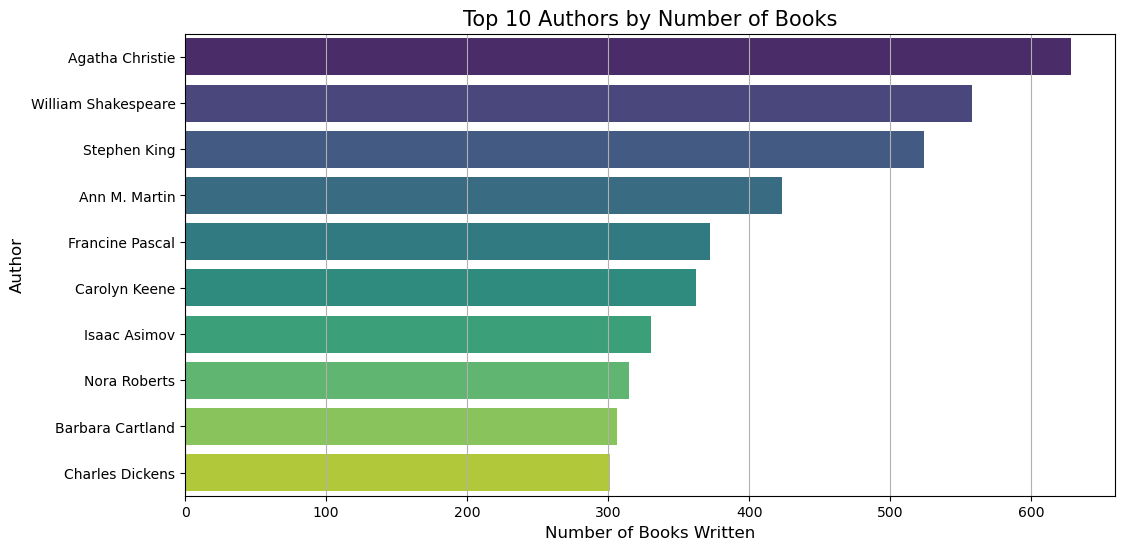

In [191]:
df_books.columns = df_books.columns.str.strip()
Top10_author = df_books['Book-Author'].value_counts().reset_index().head(10)
Top10_author.columns = ['Book-Author', 'Count']
plt.figure(figsize=(12, 6))
sns.barplot(y=Top10_author['Book-Author'], x=Top10_author['Count'], palette="viridis")
plt.xlabel("Number of Books Written", fontsize=12)
plt.ylabel("Author", fontsize=12)
plt.title("Top 10 Authors by Number of Books", fontsize=15)
plt.grid(axis='x')
plt.show()

## Value Counts Of Year-Of-Publication

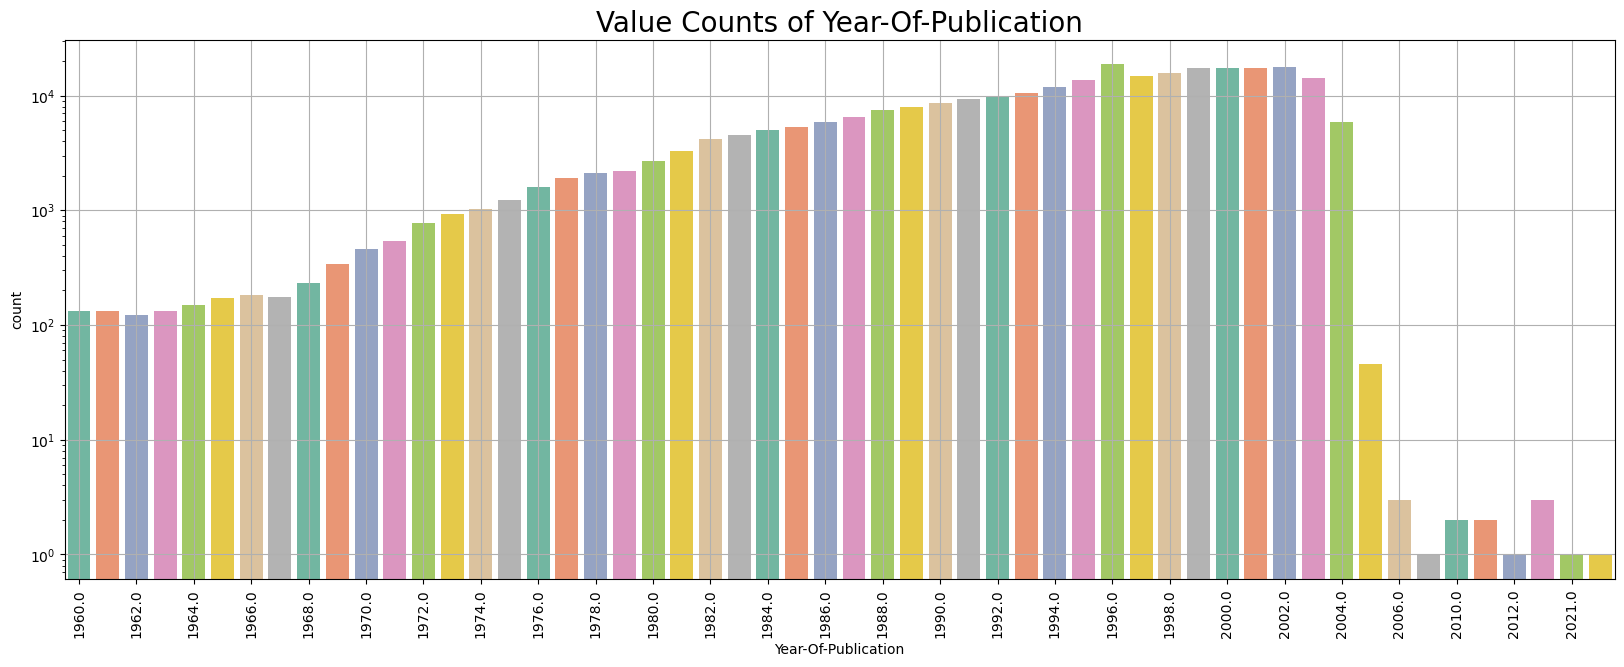

In [194]:
plt.rcParams['figure.figsize'] = (20, 7)
fig = sns.countplot(x=df_books['Year-Of-Publication'], palette="Set2")
plt.xticks(np.arange(0, len(df_books['Year-Of-Publication'].unique()), step=2), rotation=90)
plt.title("Value Counts of Year-Of-Publication", fontsize=20)
plt.yscale('log')
plt.grid()
plt.show()

## Top 10 publisher

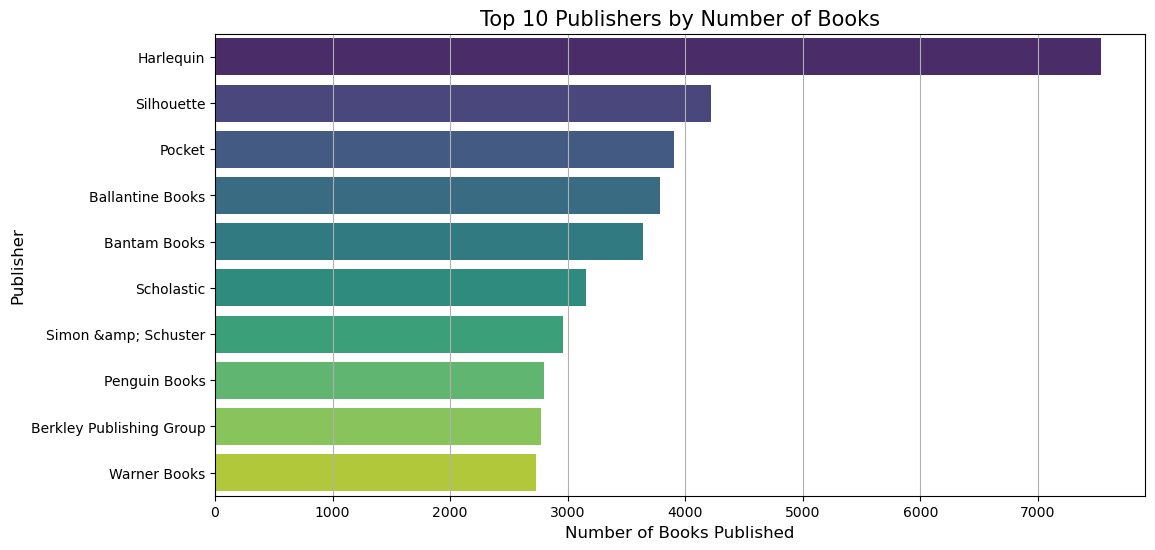

In [197]:
df_books.columns = df_books.columns.str.strip()

# Top 10 Publishers
Top10_publisher = df_books['Publisher'].value_counts().reset_index().head(10)
Top10_publisher.columns = ['Publisher', 'Count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=Top10_publisher['Publisher'], x=Top10_publisher['Count'], palette="viridis")
plt.xlabel("Number of Books Published", fontsize=12)
plt.ylabel("Publisher", fontsize=12)
plt.title("Top 10 Publishers by Number of Books", fontsize=15)
plt.grid(axis='x')
plt.show()

## Pie Plot Of Top10_Country

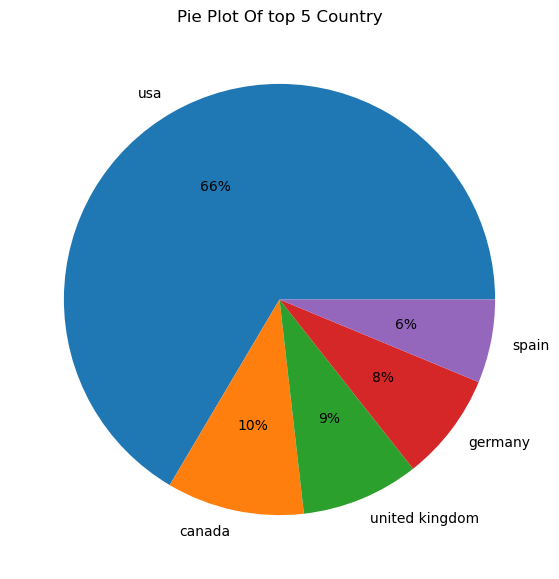

In [203]:
fig= plt.figure(figsize=(20,7))
plt.pie(Top5_Country['Count'],labels=Top5_Country['Country'],autopct='%.0f%%')
plt.title('Pie Plot Of top 5 Country')
plt.show()

## Histogram Of Book-Ratings(Excluding 0 rating count)

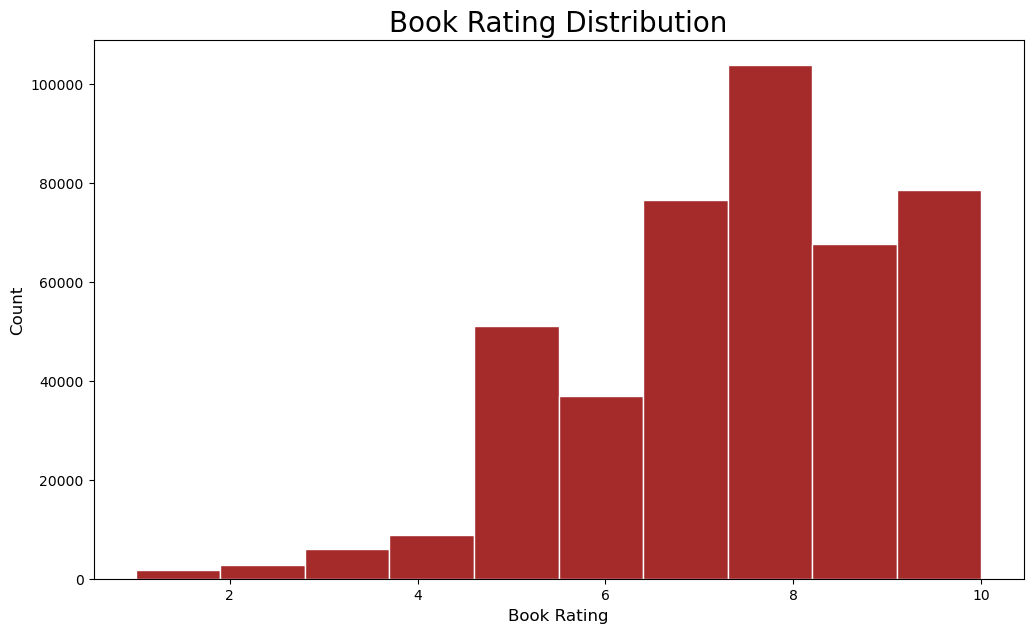

In [208]:
df_ratings = df_ratings[df_ratings['Book-Rating'] != 0]  # Remove ratings with 0

# Plot histogram
plt.figure(figsize=(12,7))
plt.xlabel("Book Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Book Rating Distribution", fontsize=20)
plt.hist(df_ratings['Book-Rating'], color="brown", edgecolor="white", bins=10)
plt.show()

## Training and Testing Datasets 

In [223]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Loaded datasets
ratings_path = r"C:\Users\nehaa\Downloads\Sem-4 FDS Dataset Book Recommendation System\Ratings.csv"
users_path = r"C:\Users\nehaa\Downloads\Sem-4 FDS Dataset Book Recommendation System\Users.csv"
books_path = r"C:\Users\nehaa\Downloads\Sem-4 FDS Dataset Book Recommendation System\Books.csv"

ratings_df = pd.read_csv(ratings_path)
users_df = pd.read_csv(users_path)
books_df = pd.read_csv(books_path)
users_df.rename(columns={"UserID": "User-ID"}, inplace=True)
ratings_df.rename(columns={"UserID": "User-ID"}, inplace=True)

print("📌 Performing 80% Training / 20% Testing Split for All Datasets...\n")
# Ratings Dataset Split
target_col_ratings = 'Book-Rating'
X_ratings = ratings_df.drop(target_col_ratings, axis=1)
y_ratings = ratings_df[target_col_ratings]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_ratings, y_ratings, test_size=0.2, random_state=42)
print("✅ Ratings dataset split complete.")
# Users Dataset Split
X_train_u, X_test_u = train_test_split(users_df, test_size=0.2, random_state=42)
print("✅ Users dataset split complete.")
# Books Dataset Split
X_train_b, X_test_b = train_test_split(books_df, test_size=0.2, random_state=42)
print("✅ Books dataset split complete.")


📌 Performing 80% Training / 20% Testing Split for All Datasets...

✅ Ratings dataset split complete.
✅ Users dataset split complete.
✅ Books dataset split complete.


# Collaborative filtering models


In [236]:
from surprise import Dataset, Reader, BaselineOnly, NMF, SVD, CoClustering
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse, mae
from sklearn.metrics import r2_score
import pandas as pd
ratings_path = r"C:\Users\nehaa\Downloads\Sem-4 FDS Dataset Book Recommendation System\Ratings.csv"
ratings_df = pd.read_csv(ratings_path)

# Prepare data for Surprise
reader = Reader(rating_scale=(ratings_df['Book-Rating'].min(), ratings_df['Book-Rating'].max()))
data = Dataset.load_from_df(ratings_df[['User-ID', 'ISBN', 'Book-Rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

print("📊 Data split: 80% for training and 20% for testing.\n")

# Function to train, fit, and evaluate a model
def train_and_evaluate_model(model, model_name):
    print(f"\n============================")
    print(f"🔷 Training & Evaluating Model: {model_name}")
    print("============================")

    model.fit(trainset)
    print("✅ Model training complete.")

    predictions = model.test(testset)
    print("📌 Predictions completed.")

    rmse_val = rmse(predictions, verbose=False)
    mae_val = mae(predictions, verbose=False)
    r2_val = r2_score([true_r for (_, _, true_r, _, _) in predictions],
                      [est for (_, _, _, est, _) in predictions])

    print(f"📈 RMSE: {rmse_val:.4f}")
    print(f"📉 MAE: {mae_val:.4f}")
    print(f"🔢 R² Score: {r2_val:.4f}")

# Run the models

# 1. BaselineOnly (replacing KNNBasic)
train_and_evaluate_model(BaselineOnly(), "BaselineOnly")

# 2. NMF
train_and_evaluate_model(NMF(), "NMF")

# 3. SVD
train_and_evaluate_model(SVD(), "SVD")

# 4. CoClustering
train_and_evaluate_model(CoClustering(), "CoClustering")


📊 Data split: 80% for training and 20% for testing.


🔷 Training & Evaluating Model: BaselineOnly
Estimating biases using als...
✅ Model training complete.
📌 Predictions completed.
📈 RMSE: 3.4031
📉 MAE: 2.8046
🔢 R² Score: 0.2220

🔷 Training & Evaluating Model: NMF
✅ Model training complete.
📌 Predictions completed.
📈 RMSE: 3.9572
📉 MAE: 3.0151
🔢 R² Score: -0.0520

🔷 Training & Evaluating Model: SVD
✅ Model training complete.
📌 Predictions completed.
📈 RMSE: 3.5043
📉 MAE: 2.8184
🔢 R² Score: 0.1750

🔷 Training & Evaluating Model: CoClustering
✅ Model training complete.
📌 Predictions completed.
📈 RMSE: 3.7779
📉 MAE: 2.9653
🔢 R² Score: 0.0412


## Comparison Table import pandas as pd

In [239]:
import pandas as pd

model_performance = {
    "Model Name": ["BaselineOnly", "SVD", "CoClustering", "NMF"],
    "RMSE": [3.4031, 3.5043, 3.7779, 3.9572],
    "MAE": [2.8046, 2.8184, 2.9653, 3.0151],
    "R² Score": [0.2220, 0.1750, 0.0412, -0.0520]
}

performance_df = pd.DataFrame(model_performance)
performance_df_sorted = performance_df.sort_values(by="RMSE")
print("📊 Model Performance Comparison Table:")
print(performance_df_sorted.to_string(index=False))

📊 Model Performance Comparison Table:
  Model Name   RMSE    MAE  R² Score
BaselineOnly 3.4031 2.8046    0.2220
         SVD 3.5043 2.8184    0.1750
CoClustering 3.7779 2.9653    0.0412
         NMF 3.9572 3.0151   -0.0520


## Observed 

📊 Model Accuracy Performance (Percentage):

          Model  Accuracy (RMSE%)  Accuracy (MAE%)  R² Score (%)
0  BaselineOnly             65.97            71.95         22.20
1           NMF             60.43            69.85         -5.20
2           SVD             64.96            71.82         17.50
3  CoClustering             62.22            70.35          4.12


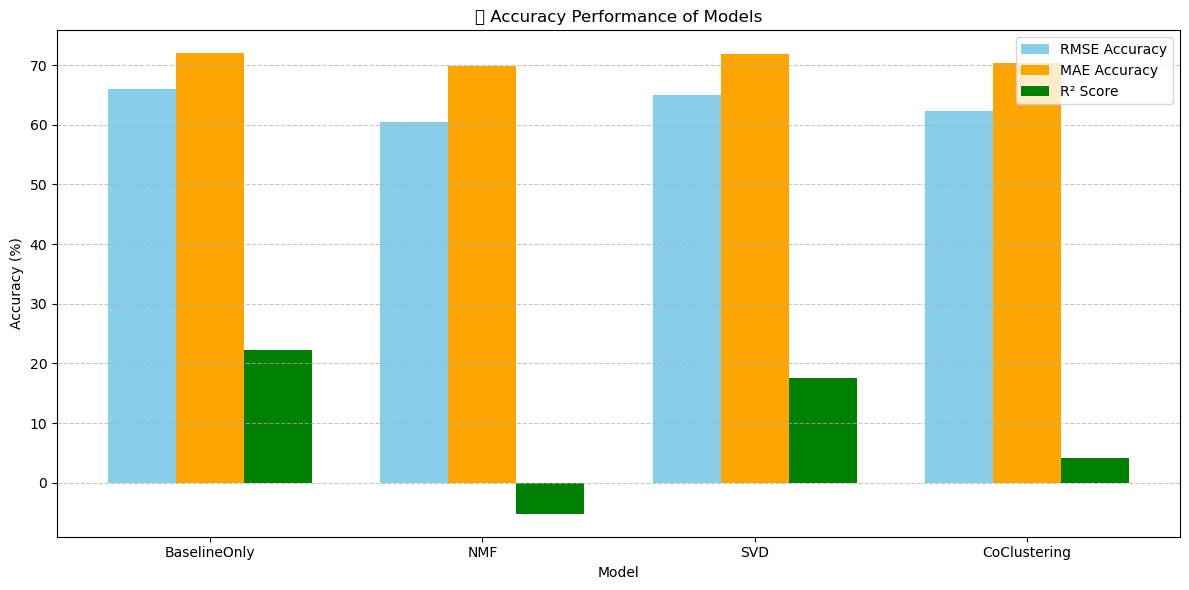

In [250]:
# Max possible rating
max_rating = 10

# Original metrics
model_metrics = {
    'BaselineOnly': {'RMSE': 3.4031, 'MAE': 2.8046, 'R2': 0.2220},
    'NMF':          {'RMSE': 3.9572, 'MAE': 3.0151, 'R2': -0.0520},
    'SVD':          {'RMSE': 3.5043, 'MAE': 2.8184, 'R2': 0.1750},
    'CoClustering': {'RMSE': 3.7779, 'MAE': 2.9653, 'R2': 0.0412},
}

df = pd.DataFrame(model_metrics).T.reset_index()
df.rename(columns={'index': 'Model'}, inplace=True)

df['Accuracy (RMSE%)'] = (1 - df['RMSE'] / max_rating) * 100
df['Accuracy (MAE%)'] = (1 - df['MAE'] / max_rating) * 100
df['R² Score (%)'] = df['R2'] * 100

accuracy_df = df[['Model', 'Accuracy (RMSE%)', 'Accuracy (MAE%)', 'R² Score (%)']].round(2)
print("📊 Model Accuracy Performance (Percentage):\n")
print(accuracy_df)

plt.figure(figsize=(12, 6))
bar_width = 0.25
index = range(len(df))

plt.bar(index, df['Accuracy (RMSE%)'], bar_width, label='RMSE Accuracy', color='skyblue')
plt.bar([i + bar_width for i in index], df['Accuracy (MAE%)'], bar_width, label='MAE Accuracy', color='orange')
plt.bar([i + bar_width * 2 for i in index], df['R² Score (%)'], bar_width, label='R² Score', color='green')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('📊 Accuracy Performance of Models')
plt.xticks([i + bar_width for i in index], df['Model'])
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Recommendation System :- Using Baseline 

In [243]:
# Prepare Surprise dataset
reader = Reader(rating_scale=(ratings_df['Book-Rating'].min(), ratings_df['Book-Rating'].max()))
data = Dataset.load_from_df(ratings_df[['User-ID', 'ISBN', 'Book-Rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train model
algo = BaselineOnly()
algo.fit(trainset)

# --------------------------
# Recommend Books to a User
# --------------------------

def recommend_books(user_id, algo, ratings_df, books_df, top_n=5):
    # Get books the user has already rated
    rated_books = ratings_df[ratings_df['User-ID'] == user_id]['ISBN'].tolist()

    # Get all books the user hasn't rated
    all_books = books_df['ISBN'].unique()
    unrated_books = [isbn for isbn in all_books if isbn not in rated_books]

    # Predict ratings for unrated books
    predictions = []
    for isbn in unrated_books:
        try:
            pred = algo.predict(user_id, isbn)
            predictions.append((isbn, pred.est))
        except:
            continue  # Skip if prediction fails (e.g., unknown ISBN)

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get top N recommendations
    top_recommendations = predictions[:top_n]

    # Create a readable DataFrame with book titles
    recommended_books = pd.DataFrame(top_recommendations, columns=['ISBN', 'Predicted Rating'])
    recommended_books = recommended_books.merge(books_df[['ISBN', 'Book-Title']], on='ISBN', how='left')

    return recommended_books[['Book-Title', 'Predicted Rating']]

# -----------------------------
# 🔍 Example Usage:
# -----------------------------

user_id_input = 276729  # Replace with any valid User-ID from your dataset
recommendations = recommend_books(user_id_input, algo, ratings_df, books_df, top_n=5)

print(f"📚 Top Book Recommendations for User {user_id_input}:\n")
print(recommendations)

Estimating biases using als...
📚 Top Book Recommendations for User 276729:

                                          Book-Title  Predicted Rating
0                                               Free          7.219257
1     Harry Potter and the Sorcerer's Stone (Book 1)          6.259453
2  Harry Potter and the Chamber of Secrets Postca...          6.232266
3  The Blue Day Book: A Lesson in Cheering Yourse...          6.162829
4  Harry Potter and the Prisoner of Azkaban (Book 3)          6.077901


## Content Based Filtering 

In [261]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Load books dataset
books_path = r"C:\Users\nehaa\Downloads\Sem-4 FDS Dataset Book Recommendation System\Books.csv"
books_df = pd.read_csv(books_path)

# Preprocessing
books_df['Book-Title'] = books_df['Book-Title'].fillna('').astype(str)
books_df['Book-Author'] = books_df['Book-Author'].fillna('').astype(str)
books_df['Publisher'] = books_df['Publisher'].fillna('').astype(str)

# Combine relevant text features
books_df['Combined'] = books_df['Book-Title'] + ' ' + books_df['Book-Author'] + ' ' + books_df['Publisher']

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(books_df['Combined'])

# Fit NearestNeighbors model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(tfidf_matrix)

# Book title to index mapping
book_indices = pd.Series(books_df.index, index=books_df['Book-Title'].str.lower()).drop_duplicates()

# Recommendation function
def recommend_books(title, n_recommendations=5):
    title = title.strip().lower()
    if title not in book_indices:
        return f"❌ Book title '{title}' not found in dataset."

    idx = book_indices[title]
    book_vector = tfidf_matrix[idx]
    distances, indices = model_knn.kneighbors(book_vector, n_neighbors=n_recommendations + 1)

    print(f"\n📘 Because you liked: {books_df['Book-Title'].iloc[idx]}")
    print("📚 You may also like:")
    for i in range(1, len(indices[0])):
        similar_idx = indices[0][i]
        print(f"{i}. {books_df['Book-Title'].iloc[similar_idx]}")

# ===== Run It =====
user_input = input("🔍 Enter a book title you like: ")
recommend_books(user_input)


🔍 Enter a book title you like:  wild animals



📘 Because you liked: Wild Animals
📚 You may also like:
1. Snake: Animals in the Wild (Animals in the Wild)
2. DK Nature Encyclopedia
3. DK Revealed: Ancient Egypt (DK Revealed)
4. Kangaroo (Animals in the Wild)
5. Koala (Animals in the Wild)
